In [90]:
#import .csv file for question 1 (interest rate vs housing price) 

from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats as st
from scipy.stats import linregress

housing_data_file = Path('Resources/melb_housing_data.csv')
housing_data_df = pd.read_csv(housing_data_file, low_memory=False)
df = housing_data_df.replace('inf', np.nan)

## Question 2
## Optimal real estate investment 

In [91]:
df

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,NaN,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0


In [92]:
## Replace 'inf' string with np.nan for proper calculations (Dropping infinite values from dataframes in pandas) following code was used in Dependancies    
df = df.replace('inf', np.nan)

In [93]:
# Convert columns to appropriate data types
for col in ['BuildingArea', 'YearBuilt']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display a brief overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [94]:
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225.0,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82.0,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,NaN,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122.0,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [95]:
# Normalize columns function
def normalize_column(col):
    return (col - col.min()) / (col.max() - col.min())

In [96]:
# Scoring function
def score_dataframe(df):
    # Normalize columns
    for feature in ['Distance', 'Rooms', 'Bedroom', 'Bathroom', 'Car', 'Landsize']:
        df[feature] = normalize_column(df[feature])

    df['BuildingArea'] = normalize_column(df['BuildingArea'])

    # Calculate and normalize building age
    current_year = pd.to_datetime('today').year
    df['BuildingAge'] = current_year - df['YearBuilt']
    df['BuildingAge'] = normalize_column(df['BuildingAge'])

    # Inverse normalize Propertycount
    df['Propertycount'] = 1 - normalize_column(df['Propertycount'])
    
    # Assign weights
    weights = {
        'Distance': -1,
        'Rooms': 1,
        'Bedroom': 1,
        'Bathroom': 1,
        'Car': 1,
        'Landsize': 1,
        'BuildingArea': 1,
        'BuildingAge': -0.5,
        'Propertycount': 1
    }

    # Calculate weighted score
    df['Score'] = (df['Distance'] * weights['Distance'] +
                   df['Rooms'] * weights['Rooms'] +
                   df['Bedroom'] * weights['Bedroom'] +
                   df['Bathroom'] * weights['Bathroom'] +
                   df['Car'] * weights['Car'] +
                   df['Landsize'] * weights['Landsize'] +
                   df['BuildingArea'] * weights['BuildingArea'] +
                   df['BuildingAge'] * weights['BuildingAge'] +
                   df['Propertycount'] * weights['Propertycount'])

    return df

In [97]:
# Apply the scoring function
scored_df = score_dataframe(df)
scored_df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,BuildingAge,Score
0,Abbotsford,68 Studley St,0.066667,h,SS,Jellis,3/9/2016,0.051975,3067.0,0.066667,...,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,0.817499,Carport,NaN,NaN,NaN
1,Airport West,154 Halsey Rd,0.133333,t,PI,Nelson,3/9/2016,0.280665,3042.0,0.100000,...,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,0.843233,Detached Garage,840000.0,0.098901,0.957333
2,Albert Park,105 Kerferd Rd,0.066667,h,S,hockingstuart,3/9/2016,0.068607,3206.0,0.066667,...,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,0.851764,Attached Garage,1275000.0,0.226374,0.888756
3,Albert Park,85 Richardson St,0.066667,h,S,Thomson,3/9/2016,0.068607,3206.0,0.066667,...,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,0.851764,Indoor,1455000.0,NaN,NaN
4,Alphington,30 Austin St,0.133333,h,SN,McGrath,3/9/2016,0.133056,3078.0,0.100000,...,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,0.901331,Parkade,NaN,0.113187,1.153285


In [98]:
# Function to remove top 1% and bottom 1% outliers
def remove_outliers(df, columns):
    for col in columns:
        upper_quantile = df[col].quantile(0.99)
        lower_quantile = df[col].quantile(0.01)
        df = df[(df[col] <= upper_quantile) & (df[col] >= lower_quantile)]
    return df

# Columns to remove outliers from
outlier_columns = ['Price', 'Landsize', 'BuildingArea']

# Remove outliers
df_no_outliers = remove_outliers(scored_df, outlier_columns)

df_no_outliers.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,BuildingAge,Score
1,Airport West,154 Halsey Rd,0.133333,t,PI,Nelson,3/9/2016,0.280665,3042.0,0.100000,...,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,0.843233,Detached Garage,840000.0,0.098901,0.957333
2,Albert Park,105 Kerferd Rd,0.066667,h,S,hockingstuart,3/9/2016,0.068607,3206.0,0.066667,...,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,0.851764,Attached Garage,1275000.0,0.226374,0.888756
5,Alphington,6 Smith St,0.200000,h,S,Brace,3/9/2016,0.133056,3078.0,0.100000,...,1930.0,Darebin City Council,-37.7707,145.0318,Northern Metropolitan,0.901331,Underground,2000000.0,0.193407,1.299962
7,Altona,158 Queen St,0.133333,h,VB,Greg,3/9/2016,0.286902,3018.0,0.100000,...,2015.0,Hobsons Bay City Council,-37.8700,144.8250,Western Metropolitan,0.758056,Parking Pad,520000.0,0.100000,0.865865
9,Altona North,45 Hearn St,0.266667,h,S,FN,3/9/2016,0.230769,3025.0,0.166667,...,1965.0,Hobsons Bay City Council,-37.8388,144.8567,Western Metropolitan,0.765892,Detached Garage,1085000.0,0.154945,1.378759


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
# Re-apply the scoring function to the dataframe with removed outliers
scored_df_no_outliers = score_dataframe(df_no_outliers)

# Group by suburb and calculate mean score for each suburb
suburb_scores = scored_df_no_outliers.groupby('Suburb')['Score'].mean().reset_index()

# Find the top 5 suburbs with the highest average score
top_suburbs = suburb_scores.sort_values(by='Score', ascending=False).head(5)

# Find the suburbs with the lowest average score
worst_suburbs = suburb_scores.sort_values(by='Score').head(5)

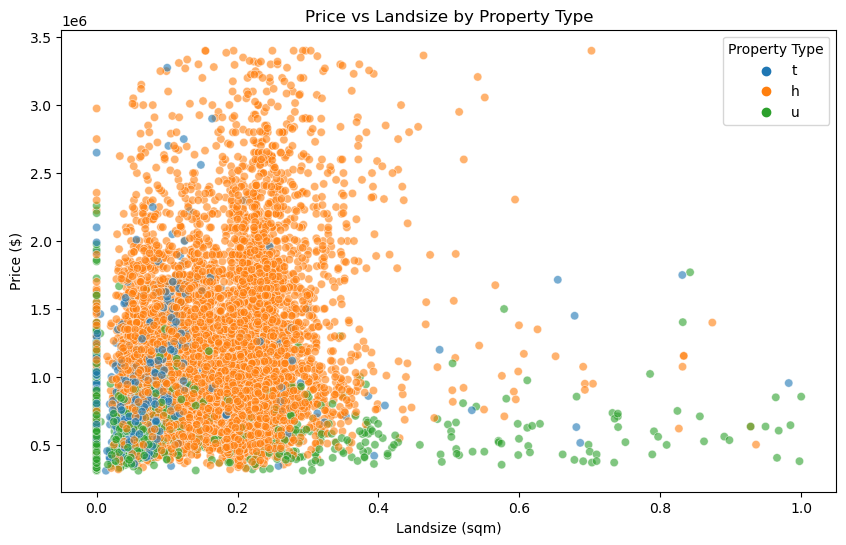

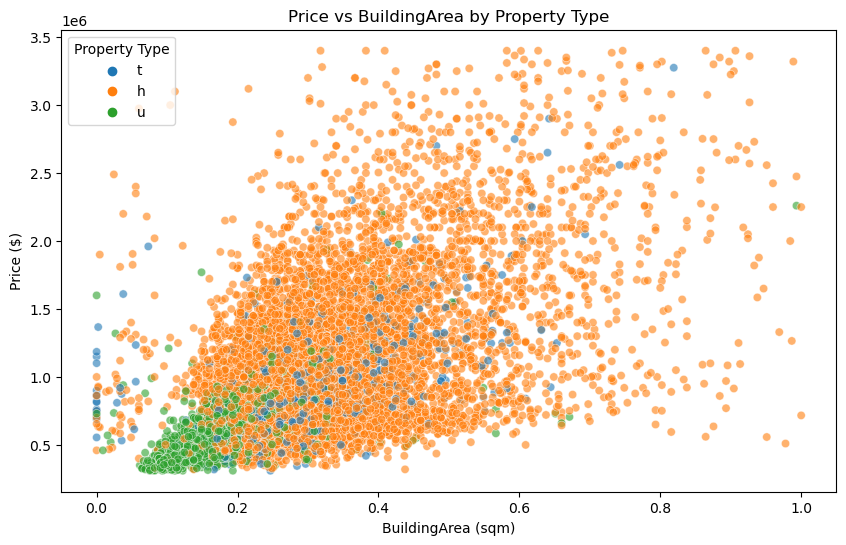

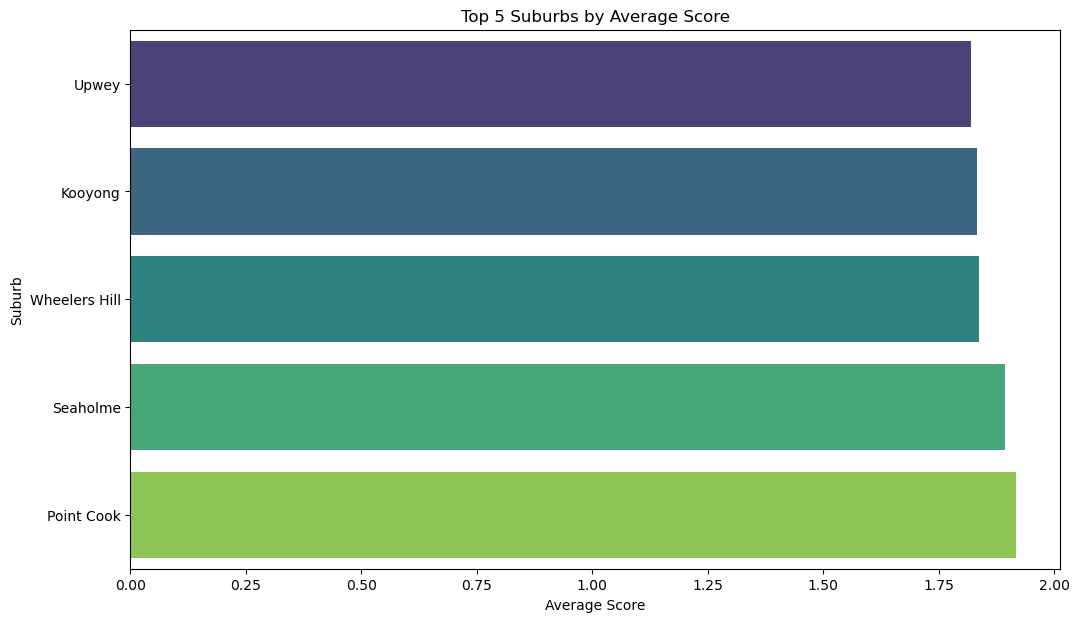

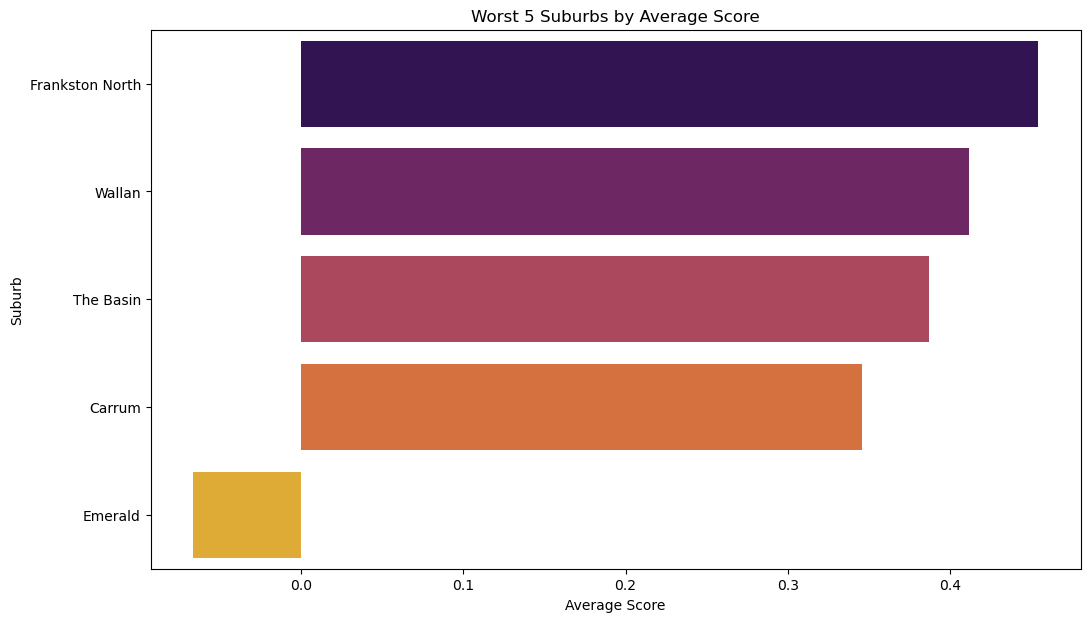

(            Suburb     Score
 233     Point Cook  1.917359
 254       Seaholme  1.893103
 304  Wheelers Hill  1.837996
 178        Kooyong  1.832107
 288          Upwey  1.819753,
               Suburb     Score
 115          Emerald -0.066573
 65            Carrum  0.345570
 281        The Basin  0.387032
 292           Wallan  0.411786
 130  Frankston North  0.454352)

In [101]:
# Scatter plot of Price vs Landsize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scored_df_no_outliers, x='Landsize', y='Price', hue='Type', alpha=0.6)
plt.title('Price vs Landsize by Property Type')
plt.xlabel('Landsize (sqm)')
plt.ylabel('Price ($)')
plt.legend(title='Property Type')
plt.show()

# Scatter plot of Price vs BuildingArea
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scored_df_no_outliers, x='BuildingArea', y='Price', hue='Type', alpha=0.6)
plt.title('Price vs BuildingArea by Property Type')
plt.xlabel('BuildingArea (sqm)')
plt.ylabel('Price ($)')
plt.legend(title='Property Type')
plt.show()

# Bar plot for top suburbs
plt.figure(figsize=(12, 7))
top_suburbs_sorted = top_suburbs.sort_values('Score', ascending=True)
sns.barplot(x='Score', y='Suburb', data=top_suburbs_sorted, palette='viridis')
plt.title('Top 5 Suburbs by Average Score')
plt.xlabel('Average Score')
plt.ylabel('Suburb')
plt.show()

# Bar plot for worst suburbs
plt.figure(figsize=(12, 7))
worst_suburbs_sorted = worst_suburbs.sort_values('Score', ascending=False)
sns.barplot(x='Score', y='Suburb', data=worst_suburbs_sorted, palette='inferno')
plt.title('Worst 5 Suburbs by Average Score')
plt.xlabel('Average Score')
plt.ylabel('Suburb')
plt.show()

(top_suburbs, worst_suburbs)


In [104]:
# Correlation coefficient between Landsize and Housing price
value1_x = scored_df_no_outliers['Landsize']
value1_y = scored_df_no_outliers['Price']
correlation = st.pearsonr(value1_x, value1_y)[0]
correlation

0.2171432770316884

In [105]:
# Correlation coefficient between Building area and Housing price
value2_x = scored_df_no_outliers['BuildingArea']
value2_y = scored_df_no_outliers['Price']
correlation2 = st.pearsonr(scored_df_no_outliers['BuildingArea'], scored_df_no_outliers['Price'])[0]
correlation2

0.5578617577181919